In [1]:
# Dependencies
%matplotlib inline
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols
from scipy import stats


In [275]:
Venta = pd.read_csv('Ventas.csv')

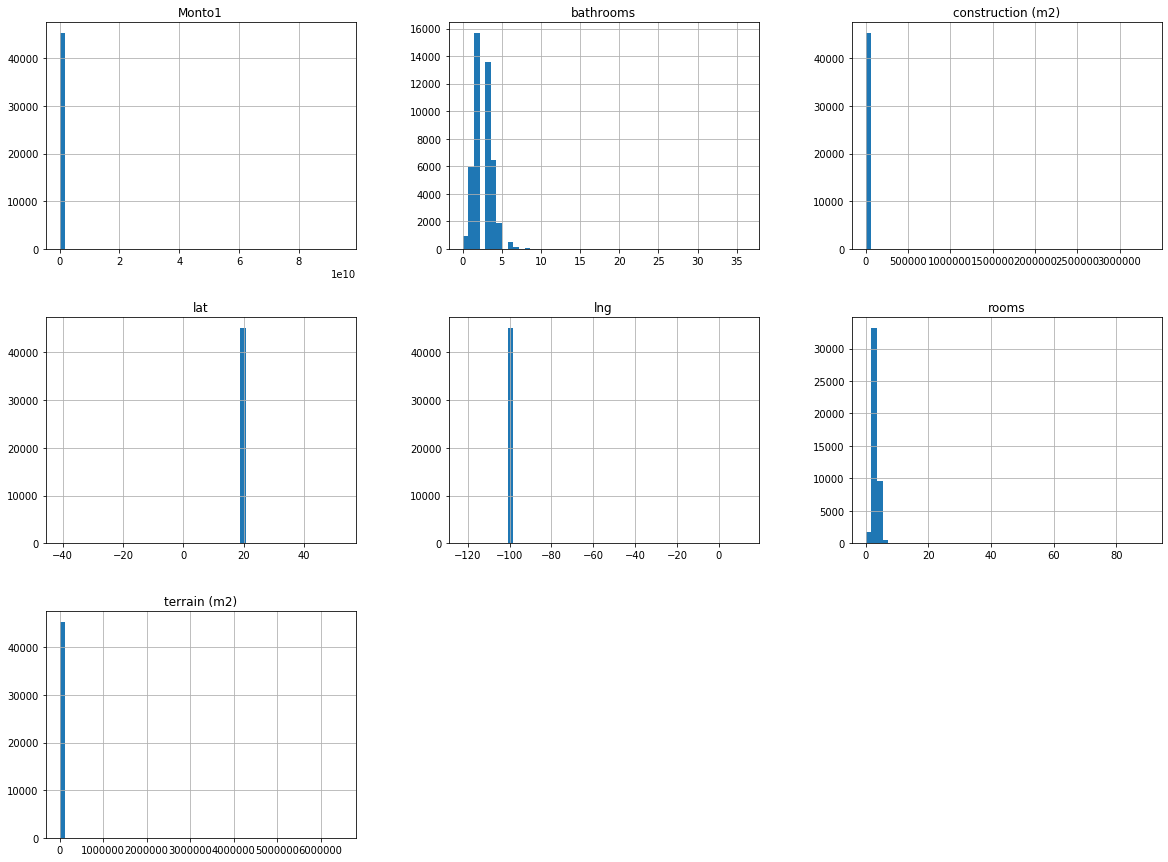

In [106]:
Venta[['rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'Monto1', 'lng', 'lat']].hist(bins = 50, figsize = (20, 15))
plt.show()

In [276]:
# acotamos montos
Venta_sel = Venta[(Venta['Monto1'] > 300000) & (Venta['Monto1'] < 70000000)]
# Terrenos
Venta_sel = Venta_sel[(Venta_sel['terrain (m2)'] > 10) & (Venta_sel['terrain (m2)'] < 1500)]
# Construcción
Venta_sel = Venta_sel[(Venta_sel['construction (m2)'] > 10) & (Venta_sel['construction (m2)'] < 1200)]
# Cuartos
Venta_sel = Venta_sel[(Venta_sel['rooms'] > 0) & (Venta_sel['rooms'] < 8)]
# Baños
Venta_sel = Venta_sel[(Venta_sel['bathrooms'] > 0) & (Venta_sel['bathrooms'] < 8) ]
# Latitud y Longitud
Venta_sel = Venta_sel[(Venta_sel['lat'] > 19.1) & (Venta_sel['lat'] < 19.8) & (Venta_sel['lng'] > - 99.4) & (Venta_sel['lng'] < - 98.8)]


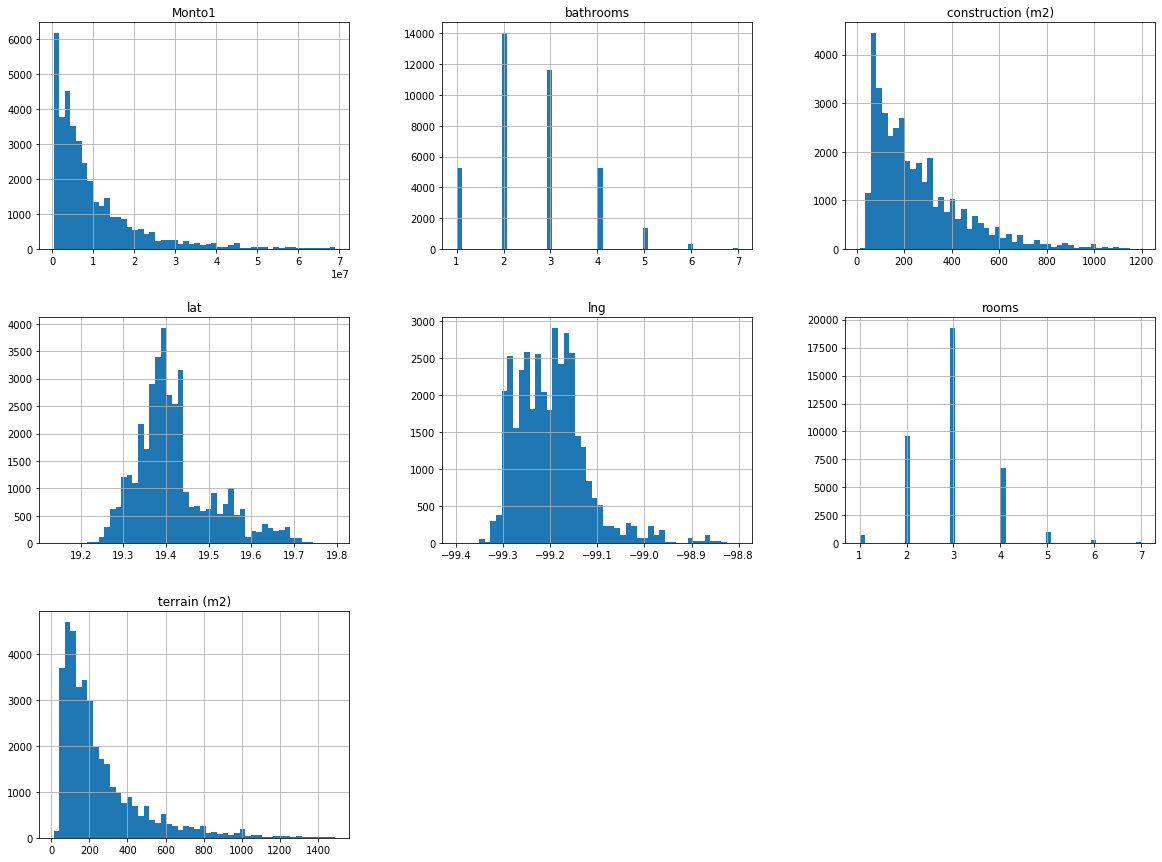

In [108]:
Venta_sel[['rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'Monto1', 'lng', 'lat']].hist(bins = 50, figsize = (20, 15))
plt.show()

In [277]:
Venta_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37888 entries, 2 to 45321
Data columns (total 24 columns):
name                 37888 non-null object
location             37888 non-null object
description          37888 non-null object
link                 37888 non-null object
price                37888 non-null object
operation            37888 non-null object
rooms                37888 non-null float64
bathrooms            37888 non-null float64
construction (m2)    37888 non-null float64
terrain (m2)         37888 non-null float64
propiedad            37888 non-null object
entidad              37888 non-null object
Moneda               37888 non-null object
Monto                37888 non-null int64
Iniciales            37888 non-null object
lat                  37888 non-null float64
lng                  37888 non-null float64
calle                16813 non-null object
numero               6342 non-null object
colonia              33477 non-null object
ciudad               36327 

In [278]:
Venta_sel["Remate"] = Venta_sel["description"].str.lower().str.contains("remate") \
                          | Venta_sel["name"].str.lower().str.contains("remate") \
                          | Venta_sel["description"].str.lower().str.contains("remate")\
                          | Venta_sel["name"].str.lower().str.contains("remate")


In [279]:
Venta_sel["Nuevo"] = Venta_sel["description"].str.lower().str.contains("nuevo") \
                          | Venta_sel["name"].str.lower().str.contains("nuevo") \
                          | Venta_sel["description"].str.lower().str.contains("nuevo")\
                          | Venta_sel["name"].str.lower().str.contains("nuevo") \
                          | Venta_sel["description"].str.lower().str.contains("desarrollo") \
                          | Venta_sel["name"].str.lower().str.contains("desarrollo") \
                          | Venta_sel["description"].str.lower().str.contains("desarrollo")\
                          | Venta_sel["name"].str.lower().str.contains("desarrollo") 


In [340]:
Venta_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37888 entries, 2 to 45321
Data columns (total 29 columns):
name                 37888 non-null object
location             37888 non-null object
description          37888 non-null object
link                 37888 non-null object
price                37888 non-null object
operation            37888 non-null object
rooms                37888 non-null float64
bathrooms            37888 non-null float64
construction (m2)    37888 non-null float64
terrain (m2)         37888 non-null float64
propiedad            37888 non-null object
entidad              37888 non-null object
Moneda               37888 non-null object
Monto                37888 non-null int64
Iniciales            37888 non-null object
lat                  37888 non-null float64
lng                  37888 non-null float64
calle                16813 non-null object
numero               6342 non-null object
colonia              33477 non-null object
ciudad               36327 

In [282]:
Venta_sel["propiedad"].value_counts()

Departamento          17979
Casa                  15219
Casa en Condominio     4690
Name: propiedad, dtype: int64

In [283]:
Venta_sel["Remate"].value_counts()

False    32013
True      5875
Name: Remate, dtype: int64

In [284]:
Venta_sel["Nuevo"].value_counts()

False    31667
True      6221
Name: Nuevo, dtype: int64

In [339]:
Venta_sel

,name,location,description,link,price,operation,rooms,bathrooms,construction (m2),terrain (m2),...,colonia,ciudad,CP,formatad,Monto1,Remate,Nuevo,one,construction,terrain
2,Oportunidad! Nuevo con Balcón en Enquentro 2 R...,"Patriotismo 883, Insurgentes Mixcoac, Benito J...",Muy Iluminado y bonito departamento en Residen...,/propiedades/oportunidad!-nuevo-con-balcon-en-...,"MN 4,890,000",venta,2.0,2.0,77.0,77.0,...,Insurgentes Mixcoac,Ciudad de México,3920.0,"Avenida Patriotismo 883, Insurgentes Mixcoac, ...",4890000.0,False,True,1,77.0,77.0
6,10 Departamentos Listos Para Escriturar Muy Il...,"Casas Grandes 149, Narvarte, Benito Juárez",Hermosos departamentos muy iluminados y con la...,/propiedades/10-departamentos-listos-para-escr...,"MN 3,200,000",venta,2.0,2.0,73.0,83.0,...,Narvarte Poniente,Ciudad de México,3020.0,"Casas Grandes 149, Narvarte Poniente, Benito J...",3200000.0,False,False,1,73.0,83.0
7,Hermoso Departamento Nuevo con Terraza de 30 m...,"Casas Grandes 149, Narvarte, Benito Juárez",Desarrollo de solo 10 departamentos listos par...,/propiedades/hermoso-departamento-nuevo-con-te...,"MN 4,400,000",venta,2.0,2.0,91.0,120.0,...,Narvarte Poniente,Ciudad de México,3020.0,"Casas Grandes 149, Narvarte Poniente, Benito J...",4400000.0,False,True,1,91.0,120.0
8,Hermoso y Gran Departamento con Roof Garden Pr...,"Paz Montes de Oca 96, General Pedro Maria Anay...",Enorme departamento de 117 mts + roof garden d...,/propiedades/hermoso-y-gran-departamento-con-r...,"MN 4,990,000",venta,2.0,2.0,117.0,200.0,...,General Anaya,Ciudad de México,3340.0,"Paz Montes de Oca 96, Gral Anaya, Benito Juáre...",4990000.0,False,False,1,117.0,200.0
9,"Departamentos con Terraza, Balcones o Roof Gar...","Saratoga 605, Portales, Benito Juárez","Super ubicados y con la mejor orientación, con...",/propiedades/departamentos-con-terraza-balcone...,"MN 3,299,953",venta,2.0,2.0,75.0,97.0,...,Portales Norte,Ciudad de México,3300.0,"Saratoga 605, Portales Nte, Benito Juárez, 033...",3299953.0,False,False,1,75.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45315,Farallon. Condominio Horizontal,"Jardines del pedregal , Jardines del Pedregal,...",Excelente residencia en conjunto horizontal de...,/propiedades/farallon.-condominio-horizontal-5...,"USD 1,350,000",venta,5.0,5.0,600.0,736.0,...,Jardines del Pedregal,Mexico City,NaN,"Jardines del Pedregal, Mexico City, CDMX, Mexico",30645000.0,False,False,1,600.0,736.0
45316,Santa Fe La Loma,"Bernardo Quintana. PATIOS II, Santa Fe La Loma...","Magnifica, Proyecto Arq. Legorreta & Legorreta...",/propiedades/santa-fe-la-loma-57580228.html,"USD 1,650,000",venta,4.0,4.0,439.0,545.0,...,La Loma,Alvaro Obregon,1210.0,"Av Bernardo Quintana 590, Santa Fe, La Loma, Á...",37455000.0,False,False,1,439.0,545.0
45318,"Lomas Altas, Casa en Venta","ROSALEDA 43, Lomas Altas, Miguel Hidalgo","Exclusiva privada solo 9 casas, hermosisima ca...",/propiedades/lomas-altas-casa-en-venta-5019835...,"USD 1,250,000",venta,4.0,4.0,550.0,1000.0,...,Lomas Altas,Ciudad de México,11950.0,"Rosaleda 43, Lomas Altas, Miguel Hidalgo, 1195...",28375000.0,False,False,1,550.0,1000.0
45319,Cumbres de Santa Fe Casa en Venta,"Avenida de los Poetas, Santa Fe, Alvaro Obregón","Gran proyecto de casa en cumbres, acabados aaa...",/propiedades/cumbres-de-santa-fe-casa-en-venta...,"USD 2,850,000",venta,4.0,4.0,630.0,720.0,...,NaN,Ciudad de México,NaN,"Av. de los Poetas, Ciudad de México, CDMX, Mexico",64695000.0,False,False,1,630.0,720.0


In [338]:
Venta_sel.to_csv("propiedades.csv",encoding="utf-8-sig")

In [285]:
Propiedad = pd.get_dummies(Venta_sel["propiedad"])


In [286]:
Venta_sel_2 = Venta_sel
Venta_sel_2['one'] = 1
Venta_sel_2['construction'] = Venta_sel_2['construction (m2)']
Venta_sel_2['terrain'] = Venta_sel_2['terrain (m2)']

In [288]:
# Formulamos la regresión
formula = 'Monto1 ~   rooms + bathrooms + construction + terrain + lat + lng + Remate + Nuevo'
results = ols(formula, Venta_sel_2).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Monto1   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     7438.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:17:37   Log-Likelihood:            -6.5038e+05
No. Observations:               37888   AIC:                         1.301e+06
Df Residuals:                   37880   BIC:                         1.301e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.751e+08   5.23e+07     -7.

In [289]:
#["rooms", "bathrooms", "construction (m2)", "terrain (m2)", "Monto1"]
Parte1 = Venta_sel_2[["rooms", "bathrooms", "construction", "terrain", "Monto1","lng","lat","Nuevo","Remate"]]

In [290]:
Parte2 = Parte1.join(Propiedad)

In [291]:
X = Parte2.loc[:, Parte2.columns != 'Monto1']
y = Parte2["Monto1"].values.reshape(-1, 1)

In [292]:
print(X.shape, y.shape)

(37888, 11) (37888, 1)


In [293]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [294]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [307]:
import joblib
filename = 'X_scaler.sav'
joblib.dump(X_scaler, "X_scaler.sav")

['X_scaler.sav']

In [328]:
import joblib
filename = 'y_scaler.sav'
joblib.dump(y_scaler, "y_scaler.sav")

['y_scaler.sav']

In [295]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [296]:
from sklearn.linear_model import Lasso
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000 # Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 5 # Test/train split

In [297]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [298]:
for degree in range(degree_min,degree_max +1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), 
                          LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,normalize=True,cv=5))
    model.fit(X_train_scaled,y_train_scaled)
    test_pred = np.array(model.predict(X_test_scaled))
    RMSE=np.sqrt(np.sum(np.square(test_pred- y_test_scaled)))
    test_score = model.score(X_test_scaled ,y_test_scaled )

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.628484985808427, tolerance: 2.2430478531008142
  tol, rng, random, positive)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You mig

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.127506240054572, tolerance: 2.28135071968369
  tol, rng, random, positive)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.754738832511066, tolerance: 2.28135071968369
  tol, rng, random, positive)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.918158720576685, tolerance: 2.28135071968369
  tol, rng, random, positive)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You m

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.1239889986291, tolerance: 2.301840277486216
  tol, rng, random, positive)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105.3874050971267, tolerance: 2.301840277486216
  tol, rng, random, positive)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157.72524355608766, tolerance: 2.301840277486216
  tol, rng, random, positive)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You 

In [299]:
print("predict ",test_pred,"  RMSE",RMSE,"   Test Score",test_score)


predict  [-0.67530919  2.23241142  0.7285492  ... -0.68746019  2.49538546
  0.25926157]   RMSE 12374.155547990369    Test Score 0.7444656505765928


In [329]:
import joblib
filename = 'model_74.sav'
joblib.dump(model, "model_74.sav")
#entrada=np.array([rooms,bathrooms,construction (m2),terrain (m2),lng,lat,casa,casa en condominio,departamento,Nuevo,Remate]).reshape(1,-1)

['model_74.sav']

In [300]:
model.steps

[('polynomialfeatures',
  PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                     order='C')),
 ('lassocv',
  LassoCV(alphas=None, copy_X=True, cv=5, eps=0.0001, fit_intercept=True,
          max_iter=5000, n_alphas=20, n_jobs=None, normalize=True, positive=False,
          precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
          verbose=False))]

In [51]:
import joblib
filename = 'model_72.sav'
joblib.dump(model, "model_72.sav")
#entrada=np.array([rooms,bathrooms,construction (m2),terrain (m2),lng,lat,casa,casa en condominio,departamento]).reshape(1,-1)
19.4906409,-99.2302626

['model_72.sav']

In [1]:
entrada=np.array([3,2,80,80,-99.2302626,19.4906409,False,True,1,0,0]).reshape(1,-1)

NameError: name 'np' is not defined

In [343]:
X

,rooms,bathrooms,construction,terrain,lng,lat,Nuevo,Remate,Casa,Casa en Condominio,Departamento
2,2.0,2.0,77.0,77.0,-99.187033,19.373451,True,False,0,0,1
6,2.0,2.0,73.0,83.0,-99.146715,19.395309,False,False,0,0,1
7,2.0,2.0,91.0,120.0,-99.146715,19.395309,True,False,0,0,1
8,2.0,2.0,117.0,200.0,-99.157598,19.360405,False,False,0,0,1
9,2.0,2.0,75.0,97.0,-99.151280,19.366525,False,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
45315,5.0,5.0,600.0,736.0,-99.209990,19.320603,False,False,0,1,0
45316,4.0,4.0,439.0,545.0,-99.256234,19.364134,False,False,0,1,0
45318,4.0,4.0,550.0,1000.0,-99.228292,19.396778,False,False,0,1,0
45319,4.0,4.0,630.0,720.0,-99.259244,19.351844,False,False,0,1,0


In [335]:
entrada_scaler = X_scaler.transform(entrada)

In [336]:
respuesta_modelo=model.predict(entrada_scaler)
#respuesta_modelo
y_scaler.inverse_transform(respuesta_modelo)

array([4082190.80237765])

In [322]:
respuesta_modelo=model.predict(entrada_scaler)
respuesta=(respuesta_modelo[0]*1.063260e+07)+9.805795e+06
respuesta

11160422.175670221

In [333]:
entrada

array([[  2.      ,   1.      ,  80.      ,  80.      , -99.187033,
         19.373451,   1.      ,   0.      ,   0.      ,   0.      ,
          1.      ]])

In [332]:
entrada_scaler

array([[-1.13123172, -1.4897368 , -0.92582764, -0.79744151,  0.15358437,
        -0.48528533,  2.24918843, -0.42992937, -0.81970898, -0.37565032,
         1.05247288]])

In [144]:
X_train_scaled

array([[ 0.02631529,  0.37139445,  1.64547025, ...,  1.21994516,
        -0.37565032, -0.95014325],
       [ 3.49895633,  1.30196008,  0.53823789, ...,  1.21994516,
        -0.37565032, -0.95014325],
       [ 1.18386231,  1.30196008,  1.0787352 , ...,  1.21994516,
        -0.37565032, -0.95014325],
       ...,
       [-1.13123172, -0.55917117, -0.84711444, ..., -0.81970898,
        -0.37565032,  1.05247288],
       [ 0.02631529,  0.37139445, -0.35384505, ..., -0.81970898,
        -0.37565032,  1.05247288],
       [ 0.02631529, -0.55917117, -0.70543068, ..., -0.81970898,
        -0.37565032,  1.05247288]])

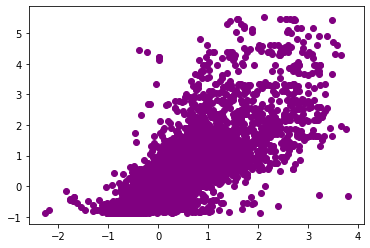

In [195]:
plt.scatter(test_pred,y_test_scaled, c="purple", label="Training Data")
plt.show()

In [177]:
# desescalar
valor=[]
for i in range(0,len(test_pred)):
    respuesta=(test_pred[i]*1.063260e+07)+9.805795e+06
    valor.append(respuesta)


In [178]:
valor

[7269522.649086572,
 40373285.26044514,
 17374922.399984322,
 15833883.767921245,
 1069318.7966644093,
 5153046.22906921,
 17355749.711307015,
 3634854.1904798774,
 11251009.641541563,
 2476490.201146635,
 5746508.696143145,
 2013251.8706705822,
 7855338.279371396,
 14843844.80055258,
 8261465.083033787,
 3794593.020030032,
 4219445.130865884,
 38203117.83470909,
 3654943.0724513046,
 6925237.138361329,
 18570454.92644856,
 5986418.297894193,
 13747965.331227649,
 3379014.508086372,
 18867476.013099477,
 5032983.374997348,
 3585322.0933472,
 2892364.2581559243,
 8035609.281164632,
 5711547.741973283,
 20408321.356411655,
 10926232.871832505,
 9464773.780233903,
 28156492.201997213,
 8676156.028475618,
 21309143.262566213,
 3049744.493417144,
 19358041.164031815,
 4100668.530493336,
 13790283.21274034,
 11764779.249043537,
 15628331.74600467,
 1264677.2038774025,
 3300858.2421008972,
 -1638206.719450336,
 7514314.718176201,
 39500551.14891139,
 41538979.27379267,
 11404438.912688142,
 6

In [135]:
min(valor)

-13867349.234521013

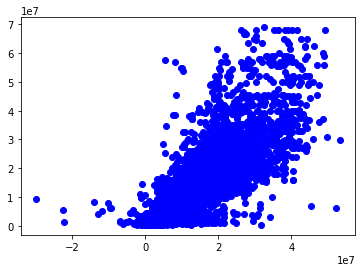

In [191]:
plt.scatter(valor,y_test, c="blue", label="Training Data")
plt.show()

[('polynomialfeatures',
  PolynomialFeatures(degree=6, include_bias=True, interaction_only=False,
                     order='C')),
 ('lassocv',
  LassoCV(alphas=None, copy_X=True, cv=5, eps=0.0001, fit_intercept=True,
          max_iter=5000, n_alphas=20, n_jobs=None, normalize=True, positive=False,
          precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
          verbose=False))]

In [121]:
model.coef_

AttributeError: 'Pipeline' object has no attribute 'coef_'